# Plotting: Interactive analysis of an RLC ressonant filter

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interactive
import matplotlib
font = {'family' : 'arial',
        'weight' : 'normal',
        'size'   : 18}

matplotlib.rc('font', **font)

## Filtro RLC passa-banda

A função resposta de um filtro RLC com resistor na saída será dada por, $$H=\frac{R}{R+Z_L+Z_C}$$
Na expressão acima,  $Z_L$ e $Z_C$ representam as impedâncias complexas do indutor e capacitor.

### Capacitor e Indutor ideais
Neste caso, $Z_L=jX_L$ e $Z_C=-jX_C$, sendo que as as reatâncias são dadas por $X_L=\omega L$ e $X_C=1/(\omega C)$
$$H=\frac{R}{R+j(X_L-X_C)}$$

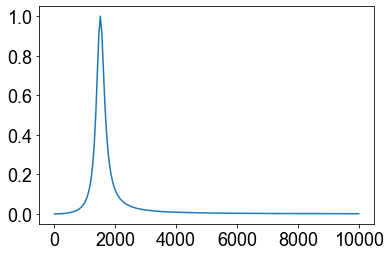

In [2]:
def T(freq,R,L,C):
    #função para gerar transmitância
    ω = 2*np.pi*freq
    XL = ω*L
    XC = 1/(ω*C)
    H = R/(R+1j*(XL-XC))
    return np.abs(H)**2
#---
#grafico básico
freq = np.linspace(10,1e4,200)
plt.plot(freq,T(freq,100,50e-3,220e-9))
plt.show()

Abaixo geramos um gráfico dentro de uma função ```plot_interactive1(R=1e2,L=50,C=220)``` que nos pemitirá gerar um gráfico interativo, nos quais os três argumentos da função ```R,L,C``` serão controlados.

In [3]:
def plot_interactive1(R=1e2,L=50,C=220):
    #Esta função gera o grafico com base nos parâmetros R,L,C
    #Unidades: R[Ω]; L[mH]; C[nF]
    #-------
    L = L*1e-3 #converte para H
    C = C*1e-9 # converte para F
    f0 = 1/(2*np.pi*np.sqrt(L*C)) # ressonancia
    f1 = ((1/2)*((C**-1)*((L**-1)*((C*R)+((C**(1/2))*(((4*L)+(C*(R**2)))**(1/2))))))) /(2*np.pi)
    f2 = ((1/2)*((C**-1)*((L**-1)*((-1*(C*R))+((C**(1/2))*(((4*L)+(C*(R**2)))**(1/2))))))) /(2*np.pi)
    #---graficos
    fig, ax = plt.subplots(1,2,figsize=(12,4))
    #---------------
    #eixo da esquerda
    #---------------
    ax[0].plot(freq,T(freq,R,L,C)) # transmitância
    ax[0].plot(freq,0*freq+0.5,'--k') #meia-altura
    ax[0].plot([f1,f0, f2],[T(f1,R,L,C),T(f0,R,L,C),T(f2,R,L,C)],'or')# pontos da largura meia altura
    #formatação do gráfico
    ax[0].set_xlabel('Frequência (Hz)')
    ax[0].set_ylabel('Transmitância')
    ax[0].set_xlim([10,1e4])
    ax[0].set_ylim([0,1.1])
    ax[0].grid(True)
    #---------------
    #eixo da direita
    #---------------
    ax[1].plot(freq,10*np.log10(T(freq,R,L,C)))
    ax[1].plot(freq,0*freq-3,'--k')
    ax[1].plot([f1, f2],10*np.log10([T(f1,R,L,C),T(f2,R,L,C)]),'or')
    #formatação do gráfico
    ax[1].set_xlabel('Frequência (Hz)')
    ax[1].set_ylabel('Transmitância (dB)')
    ax[1].set_xlim([10,1e4])
    ax[1].set_ylim([-30,0.5])
    ax[1].grid(True)
    plt.xscale('log')
    plt.tight_layout()
    plt.show()

In [4]:
freq = np.linspace(10,1e4,200)
graph1 = interactive(plot_interactive1,R=(1e2,1e3,100),L=(10,100,10),C=(100,800,100))
graph1

interactive(children=(FloatSlider(value=100.0, description='R', max=1000.0, min=100.0, step=100.0), IntSlider(…

###  Indutor com resistência interna (em série),
Neste caso, $Z_L=r_L+jX_L$ e $Z_C=-jX_C$, sendo que as as reatâncias são dadas por $X_L=\omega L$ e $X_C=1/(\omega C)$
$$H=\frac{R}{R+r_l+j(X_L-X_C)}$$

In [5]:
def T(freq,R=1e2,rl=0,L=50,C=220):
    ω = 2*np.pi*freq
    XL = ω*L
    XC = 1/(ω*C)
    H = R/(R+rl+1j*(XL-XC))
    return np.abs(H)**2
def plot_interactive2(R=1e2,rl=0,L=50,C=220):
    #Esta função gera o grafico com base nos parâmetros R,L,C
    #Unidades: R[Ω]; L[mH]; C[nF]
    L = L*1e-3 #converte para H
    C = C*1e-9 # converte para F
    f0 = 1/(2*np.pi*np.sqrt(L*C)) # ressonancia
    f1 = ((1/2)*((C**-1)*((L**-1)*((C*R)+((C*rl)+(((4*(C*L))+(((-1*(C*R))+(-1*(C*rl)))**2))**(1/2)))))))/(2*np.pi)
    f2 = ((1/2)*((C**-1)*((L**-1)*((-1*(C*R))+((-1*(C*rl))+(((4*(C*L))+(((C*R)+(C*rl))**2))**(1/2)))))))/(2*np.pi)
    #---graficos
    fig, ax = plt.subplots(1,2,figsize=(12,4))
    #---------------
    #eixo da esquerda
    #---------------
    ax[0].plot(freq,T(freq,R,rl,L,C))
    ax[0].plot(freq,0*freq+T(f0,R,rl,L,C)/2,'--k')
    ax[0].plot([f1, f0, f2],[T(f1,R,rl,L,C),T(f0,R,rl,L,C),T(f2,R,rl,L,C)],'or')
    #formatação do gráfico
    ax[0].set_xlabel('Frequência (Hz)')
    ax[0].set_ylabel('Transmitância')
    ax[0].set_xlim([10,1e4])
    ax[0].set_ylim([0,1.1])
    ax[0].grid(True)
    #---------------
    #eixo da direita
    #---------------
    ax[1].plot(freq,10*np.log10(T(freq,R,rl,L,C)))
    ax[1].plot(freq,0*freq +10*np.log10(T(f0,R,rl,L,C))-3,'--k')
    ax[1].plot([f1, f0, f2],10*np.log10([T(f1,R,rl,L,C),T(f0,R,rl,L,C),T(f2,R,rl,L,C)]),'or')
    #formatação do gráfico
    ax[1].set_xlabel('Frequência (Hz)')
    ax[1].set_ylabel('Transmitância (dB)')
    ax[1].set_xlim([10,1e4])
    ax[1].set_ylim([-30,0.5])
    ax[1].grid(True)
    plt.xscale('log')
    plt.tight_layout()
    plt.show()
graph2 = interactive(plot_interactive2,R=(1e2,1e3,100),rl=(0,100,10),L=(10,100,10),C=(100,800,100))

In [6]:
freq = np.linspace(10,1e4,200)
graph2

interactive(children=(FloatSlider(value=100.0, description='R', max=1000.0, min=100.0, step=100.0), IntSlider(…